In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
import prepare

In [2]:
url = 'https://github.com/search?q=stars%3A%3E5&type=Repositories'

In [3]:
requests.get(url)

<Response [429]>

In [231]:
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
# soup

In [232]:
repos = soup.select('a.v-align-middle')
repos[0]['href']

IndexError: list index out of range

In [47]:
names = []
for r in repos:
    repo_name = r['href']
    names.append(repo_name)

In [48]:
names

['/freeCodeCamp/freeCodeCamp',
 '/996icu/996.ICU',
 '/EbookFoundation/free-programming-books',
 '/jwasham/coding-interview-university',
 '/sindresorhus/awesome',
 '/kamranahmedse/developer-roadmap',
 '/public-apis/public-apis',
 '/vuejs/vue',
 '/facebook/react',
 '/tensorflow/tensorflow']

In [37]:
len(names)

25

In [8]:
def get_repo_names():
    names = []
    url = 'https://github.com/search?q=stars%3A%3E5&type=Repositories'
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    repos = soup.select('a.v-align-middle')
    for r in repos:
        repo_name = r['href']
        names.append(repo_name)
    page = 2
    while page <= 10:
        url = f'https://github.com/search?p={page}&q=stars%3A%3E5&type=Repositories'
        soup = BeautifulSoup(requests.get(url).content, 'html.parser')
        repos = soup.select('a.v-align-middle')
        for r in repos:
            repo_name = r['href']
            names.append(repo_name)
        print('moving to page '+str(page))
        page += 1
    
    return names

In [9]:
test = get_repo_names()

moving to page 2
moving to page 3
moving to page 4
moving to page 5
moving to page 6
moving to page 7
moving to page 8
moving to page 9
moving to page 10


In [10]:
test

['/freeCodeCamp/freeCodeCamp',
 '/996icu/996.ICU',
 '/EbookFoundation/free-programming-books',
 '/jwasham/coding-interview-university',
 '/sindresorhus/awesome',
 '/kamranahmedse/developer-roadmap',
 '/public-apis/public-apis',
 '/donnemartin/system-design-primer',
 '/vuejs/vue',
 '/facebook/react',
 '/tensorflow/tensorflow',
 '/codecrafters-io/build-your-own-x',
 '/getify/You-Dont-Know-JS',
 '/twbs/bootstrap',
 '/CyC2018/CS-Notes',
 '/trekhleb/javascript-algorithms',
 '/ohmyzsh/ohmyzsh',
 '/TheAlgorithms/Python',
 '/vinta/awesome-python',
 '/torvalds/linux',
 '/airbnb/javascript',
 '/jackfrued/Python-100-Days',
 '/ossu/computer-science',
 '/ytdl-org/youtube-dl',
 '/jlevy/the-art-of-command-line',
 '/labuladong/fucking-algorithm',
 '/awesome-selfhosted/awesome-selfhosted',
 '/facebook/react-native',
 '/golang/go',
 '/electron/electron',
 '/awesome-selfhosted/awesome-selfhosted',
 '/facebook/react-native',
 '/golang/go',
 '/electron/electron',
 '/30-seconds/30-seconds-of-code',
 '/d3/d3

In [11]:
# df = acquire.scrape_github_data()
# pd.DataFrame(df)

In [4]:
df = pd.read_json('data.json')

In [5]:
df.isnull().sum()

repo                0
language           14
readme_contents     0
dtype: int64

In [6]:
df[df.language.isnull()]

,repo,language,readme_contents
171,/gzc426/Java-Interview,None,\n- 本仓库会持续更新，欢迎Star给一个鼓励！\n- 本github最初的版本是一份wo...
182,/IdreesInc/Monocraft,None,# Monocraft\n\n![](images/preview.png)\n\nThe ...
184,/ribot/android-guidelines,None,Thank you for your interest in ribot’s develop...
195,/privacy-protection-tools/anti-AD,None,# anti-AD\n\n#### 致力于成为中文区命中率最高的广告过滤列表，实现精确的广告...
206,/OpnTec/openxlab-artwork,None,# openxlab-artwork\nOpenXlab Artwork\n
207,/CPdogson/996action,None,> 最新进展：\r\n- 条例修改建议：[向国务院提议修改《劳动保障监察条例》的初步设计](...
213,/qinjx/30min_guides,None,30min_guides\n============\n\n覃健祥的学习笔记，各种几十分钟入...
227,/toddmotto/angularjs-styleguide,None,# AngularJS styleguide (ES2015)\n\n### Up-to-d...
232,/audreyfeldroy/favicon-cheat-sheet,None,favicon-cheat-sheet\n===================\n\nA ...
236,/acdlite/react-fiber-architecture,None,# React Fiber Architecture\n\n## Introduction\...


In [8]:
df_clean = prepare.clean_df(df,
                    ['readme_contents'],
                    'stemming',
                    extra_words=['\'', 'td', '&#9', 'a', 'br', '&#9;', 'use'])

In [9]:
# df = df.dropna()

In [11]:
df_clean.isnull().sum()

repo                     0
language                 0
readme_contents          0
readme_contents_clean    0
dtype: int64

In [12]:
df_clean.language.value_counts()

JavaScript    97
Python        97
Other         42
Go            10
Name: language, dtype: int64

In [13]:
df_clean.shape

(246, 4)

In [15]:
# def create_other(df):
#     copy = df.language.copy()
#     output = []
#     for lang in copy:
#         if (lang != 'JavaScript') & (lang != 'Python') & (lang != 'Go'):
#             output.append('Other')
#         else:
#             output.append(lang)
#     return output

In [16]:
# # potentially for project use
# def clean_df(df, cols_to_clean, method='lemmatize', extra_words=[], exclude_words=[]):
#     d = df.copy()
#     for col in cols_to_clean:
#         d[col+'_clean'] = clean_data(d[col], method, extra_words, exclude_words)
#     return d

# def clean_data(col, method='lemmatize', extra_words=[], exclude_words=[]):
#     bc = [basic_clean(entry) for entry in col]   
#     t = [tokenize(entry) for entry in bc]
#     if method == 'lemmatize':
#         l = [lemmatize(entry) for entry in t]
#         return [remove_stopwords(entry, extra_words, exclude_words) for entry in l]
#     if method == 'stemming':
#         s = [stem(entry) for entry in t]
#         return [remove_stopwords(entry, extra_words, exclude_words) for entry in s]


# # backgroud functions used inside of above functions
# def basic_clean(text):
#     temp = text.lower()
#     temp = unicodedata.normalize('NFKD', temp).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     temp = re.sub(r'[^a-zA-Z0-9\'\s]', '', temp)
#     return temp

# def tokenize(text):
#     token = nltk.tokenize.ToktokTokenizer()
#     temp = token.tokenize(text, return_str=True)
#     return temp

# def stem(text):
#     ps = nltk.porter.PorterStemmer()
#     stems = [ps.stem(word) for word in text.split(' ')]
#     stemmed = ' '.join(stems)
#     return stemmed

# def lemmatize(text):
#     wnl = nltk.stem.WordNetLemmatizer()
#     lemons = [wnl.lemmatize(word) for word in text.split(' ')]
#     lemmatized = ' '.join(lemons)
#     return lemmatized

# def remove_stopwords(text, extra_words=[], exclude_words=[]):
#     words = text.split(' ')
#     stopwords_list = stopwords.words('english')
#     if len(extra_words) > 0:
#         stopwords_list.extend(extra_words)
#     if len(exclude_words) > 0:
#         [stopwords_list.remove(w) for w in exclude_words]
#     filtered_words = [word for word in words if word not in stopwords_list]
#     return ' '.join(filtered_words)

In [17]:
df_clean

,repo,language,readme_contents,readme_contents_clean
0,/facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...
1,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesomeselfhosted\n\nawesomehttpscdnjsdelivrne...
2,/30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttps30secondsofcodeorgjsp1\n\n 30 ...
3,/facebook/create-react-app,JavaScript,# Create React App [![Build Status](https://de...,creat react app build statushttpsdevazurecomfa...
4,/vercel/next.js,JavaScript,packages/next/README.md,packagesnextreadmemd
...,...,...,...,...
252,/JohnCoates/Aerial,Other,"<p align=""center"">\n <img src=""https://cloud....",p aligncenter\n img srchttpscloudgithubusercon...
253,/OpenZeppelin/openzeppelin-contracts,JavaScript,"# <img src=""logo.svg"" alt=""OpenZeppelin"" heigh...",img srclogosvg altopenzeppelin height40px\n\nd...
256,/petkaantonov/bluebird,JavaScript,"<a href=""http://promisesaplus.com/"">\n <img...",hrefhttppromisesapluscom\n img srchttppromises...
257,/yichengchen/clashX,Other,"<h1 align=""center"">\n <img src=""https://githu...",h1 aligncenter\n img srchttpsgithubcomdreamacr...


In [161]:
all_words = ' '.join(df_clean['readme_contents_clean'])
js_words = ' '.join(df_clean[df_clean.language == 'JavaScript']['readme_contents_clean'])
py_words = ' '.join(df_clean[df_clean.language == 'Python']['readme_contents_clean'])
go_words = ' '.join(df_clean[df_clean.language == 'Go']['readme_contents_clean'])
ot_words = ' '.join(df_clean[df_clean.language == 'Other']['readme_contents_clean'])

In [162]:
all_freq = pd.Series(all_words.split()).value_counts()
js_freq = pd.Series(js_words.split()).value_counts()
py_freq = pd.Series(py_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
ot_freq = pd.Series(ot_words.split()).value_counts()

In [163]:
all_freq.head()

a             2297
thi           1773
sourc         1311
javascript    1271
li            1185
dtype: int64

In [164]:
js_freq.head()

javascript    1189
sourc         1125
thi            867
a              797
react          731
dtype: int64

In [165]:
py_freq.head()

thi       461
python    442
instal    327
br        314
file      294
dtype: int64

In [166]:
go_freq.head()

go      220
valu    178
thi     165
name    132
func    123
dtype: int64

In [167]:
ot_freq.head()

a       1387
li      1134
ul       298
thi      280
file     180
dtype: int64

In [168]:
word_counts = pd.concat([js_freq, py_freq, go_freq, ot_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['js', 'py', 'go', 'ot', 'all']
word_counts

,js,py,go,ot,all
javascript,1189,43,25,14,1271
sourc,1125,79,14,93,1311
thi,867,461,165,280,1773
a,797,85,28,1387,2297
react,731,2,0,2,735
...,...,...,...,...,...
satur,0,0,0,1,1
avg,0,0,0,1,1
caffemodel,0,0,0,1,1
deploytxt,0,0,0,1,1


In [169]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '% of lang for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

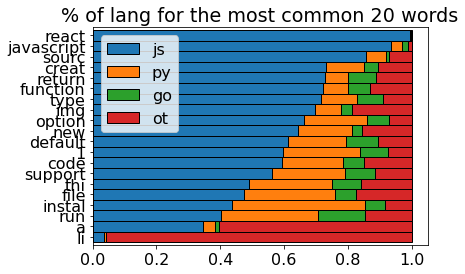

In [170]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'js')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of lang for the most common 20 words')

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [172]:
X = df_clean.readme_contents_clean
y = df_clean.language

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=.25,
                                                 random_state=123)
X_train.shape, X_val.shape, X_test.shape

((147,), (49,), (50,))

In [184]:
cv = CountVectorizer()
train_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_bow, y_train)
tree.score(train_bow, y_train)

0.9795918367346939

In [185]:
val_bow = cv.transform(X_val)
tree.score(val_bow, y_val)

0.673469387755102

In [186]:
tv = TfidfVectorizer()
train_bow = tv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(train_bow, y_train)
tree.score(train_bow, y_train)

0.9931972789115646

In [187]:
val_bow = tv.transform(X_val)
tree.score(val_bow, y_val)

0.7142857142857143

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [223]:
tv = TfidfVectorizer(ngram_range=(2, 3))
train_bow = tv.fit_transform(X_train)
val_bow = tv.transform(X_val)

# cv = CountVectorizer(ngram_range=(2, 3))
# train_bow = cv.fit_transform(X_train)
# val_bow = cv.transform(X_val)

nb = MultinomialNB(alpha=1)
nb.fit(train_bow, y_train)
nb.score(train_bow, y_train), nb.score(val_bow, y_val)

(0.9319727891156463, 0.5102040816326531)